In [1]:
import numpy as np 

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
tips = sns.load_dataset('tips')
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


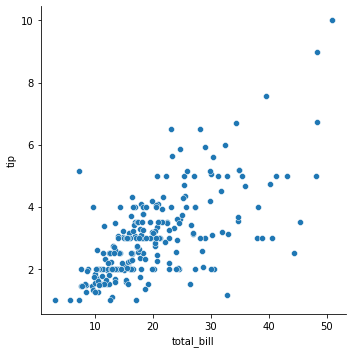

In [7]:
sns.relplot(x='total_bill', y='tip', data=tips)

Text(10.049999999999997, 0.5, 'Tip ($)')

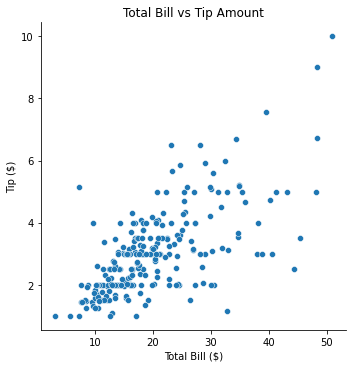

In [8]:
sns.relplot(x='total_bill', y='tip', data=tips)
plt.title('Total Bill vs Tip Amount')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')

col

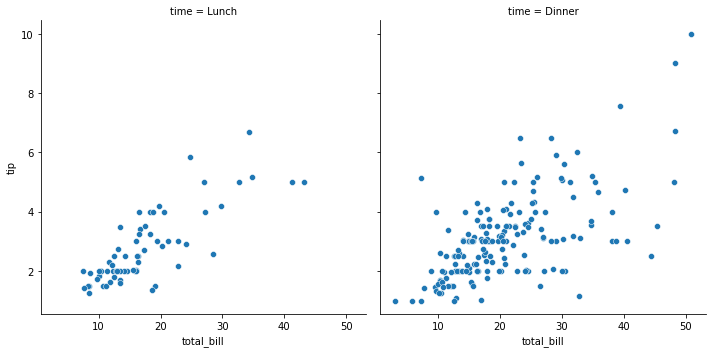

In [9]:
sns.relplot(x='total_bill', y='tip', col='time', data=tips)

hue

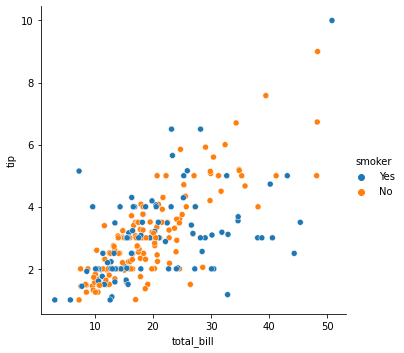

In [10]:
sns.relplot(x='total_bill', y='tip', hue='smoker', data=tips)

style

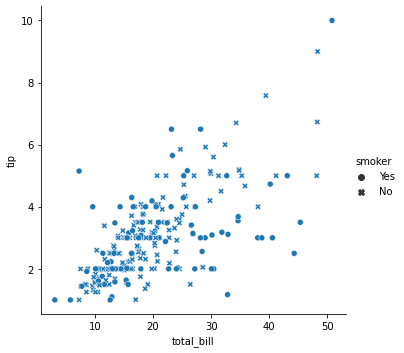

In [12]:
sns.relplot(x='total_bill', y='tip', style='smoker', data=tips)

All special options can be COMBINED

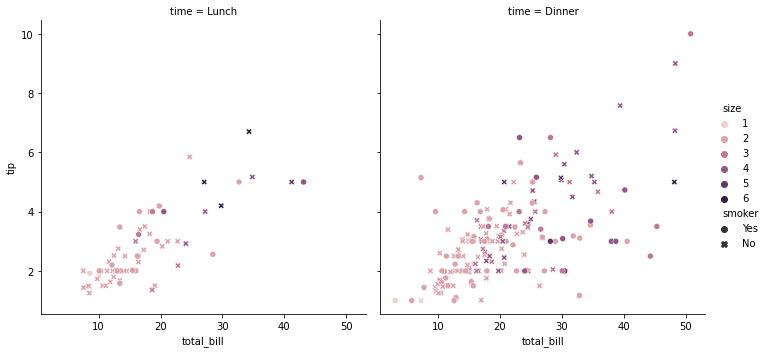

In [13]:
sns.relplot(x='total_bill', y='tip', col='time', hue='size', style='smoker', data=tips)

### Other Chart Types 

histplot is a function that can be used to check the distribution of a dataset 
the kde=True argument approximates the distribution for continuous values 

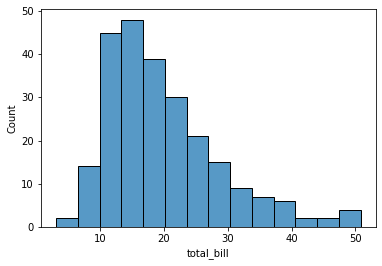

In [16]:
sns.histplot(tips.total_bill)
plt.show()

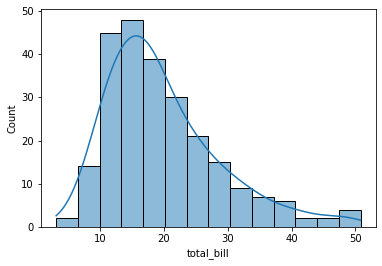

In [17]:
sns.histplot(tips.total_bill, kde=True)
plt.show()

## BOXPLOT

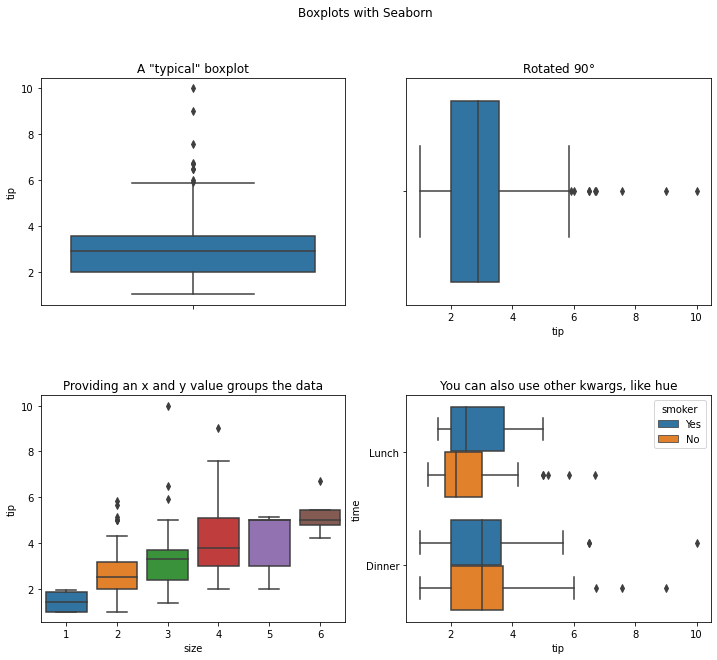

In [18]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(221)
sns.boxplot(data=tips, y='tip')
plt.title('A "typical" boxplot')

plt.subplot(222)
sns.boxplot(data=tips, x='tip')
plt.title('Rotated 90$\degree$')

plt.subplot(223)
sns.boxplot(data=tips, y='tip', x='size')
plt.title('Providing an x and y value groups the data')

plt.subplot(224)
sns.boxplot(data=tips, y='time', x='tip', hue='smoker')
plt.title('You can also use other kwargs, like hue')

plt.subplots_adjust(hspace=0.4)

heatmap

size,1,2,3,4,5,6
time,,,,,,
Lunch,2,52,5,5,1,3
Dinner,2,104,33,32,4,1


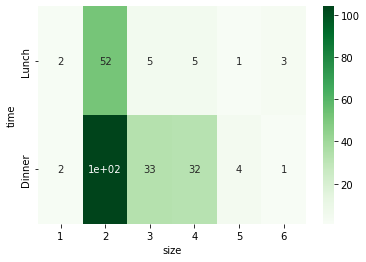

In [19]:
data = pd.crosstab(tips.time, tips['size'])
sns.heatmap(data, annot=True, cmap=plt.cm.Greens)
data

Text(0.5, 1.0, 'tip')

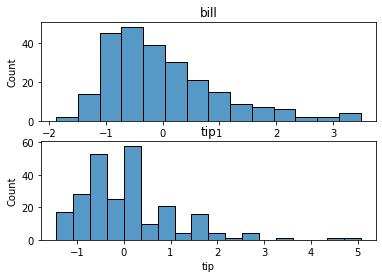

In [23]:
def scale(series):
    return (series - series.mean()) / series.std()
df = pd.DataFrame({'bill': scale(tips.total_bill), 'tip': scale(tips.tip)})

plt.subplot(211)
sns.histplot(df.bill)
plt.title('bill')

plt.subplot(212)
sns.histplot(df.tip)
plt.title('tip')

To get a very broad view of an entire data set, the pairplot function can be used. It will visualize the relationship between every quantitative feature in a dataset

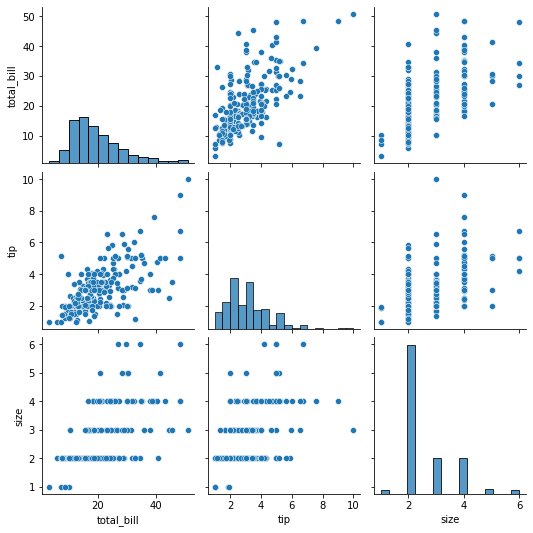

In [24]:
sns.pairplot(tips)

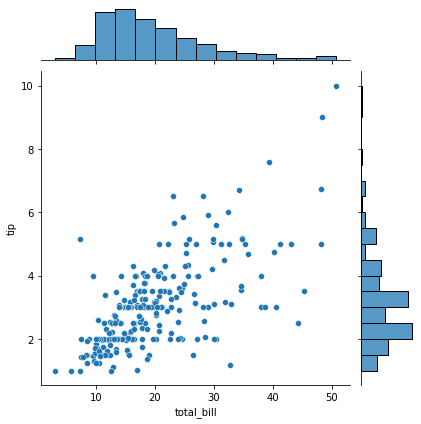

In [25]:
sns.jointplot(data=tips, x='total_bill', y='tip')

In [26]:
crash_df = sns.load_dataset('car_crashes')
crash_df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


Ditribution Plot 

A distribution for one variable 

<AxesSubplot:xlabel='not_distracted'>

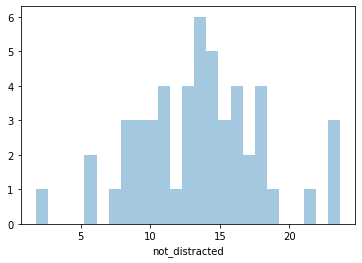

In [30]:
sns.distplot(crash_df['not_distracted'], kde=False, bins=25)

Joint Plot 

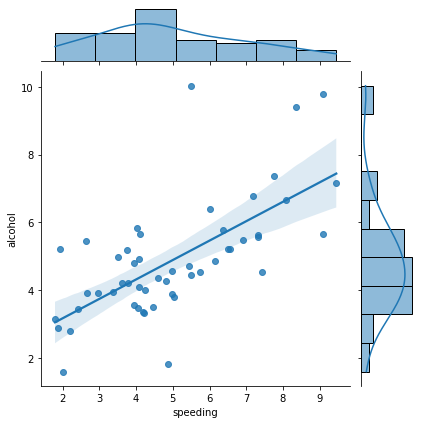

In [31]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

KDE Plot 

In [ ]:
sns.kdeplot(crash_df.)

Rug Plot

Pair Plots

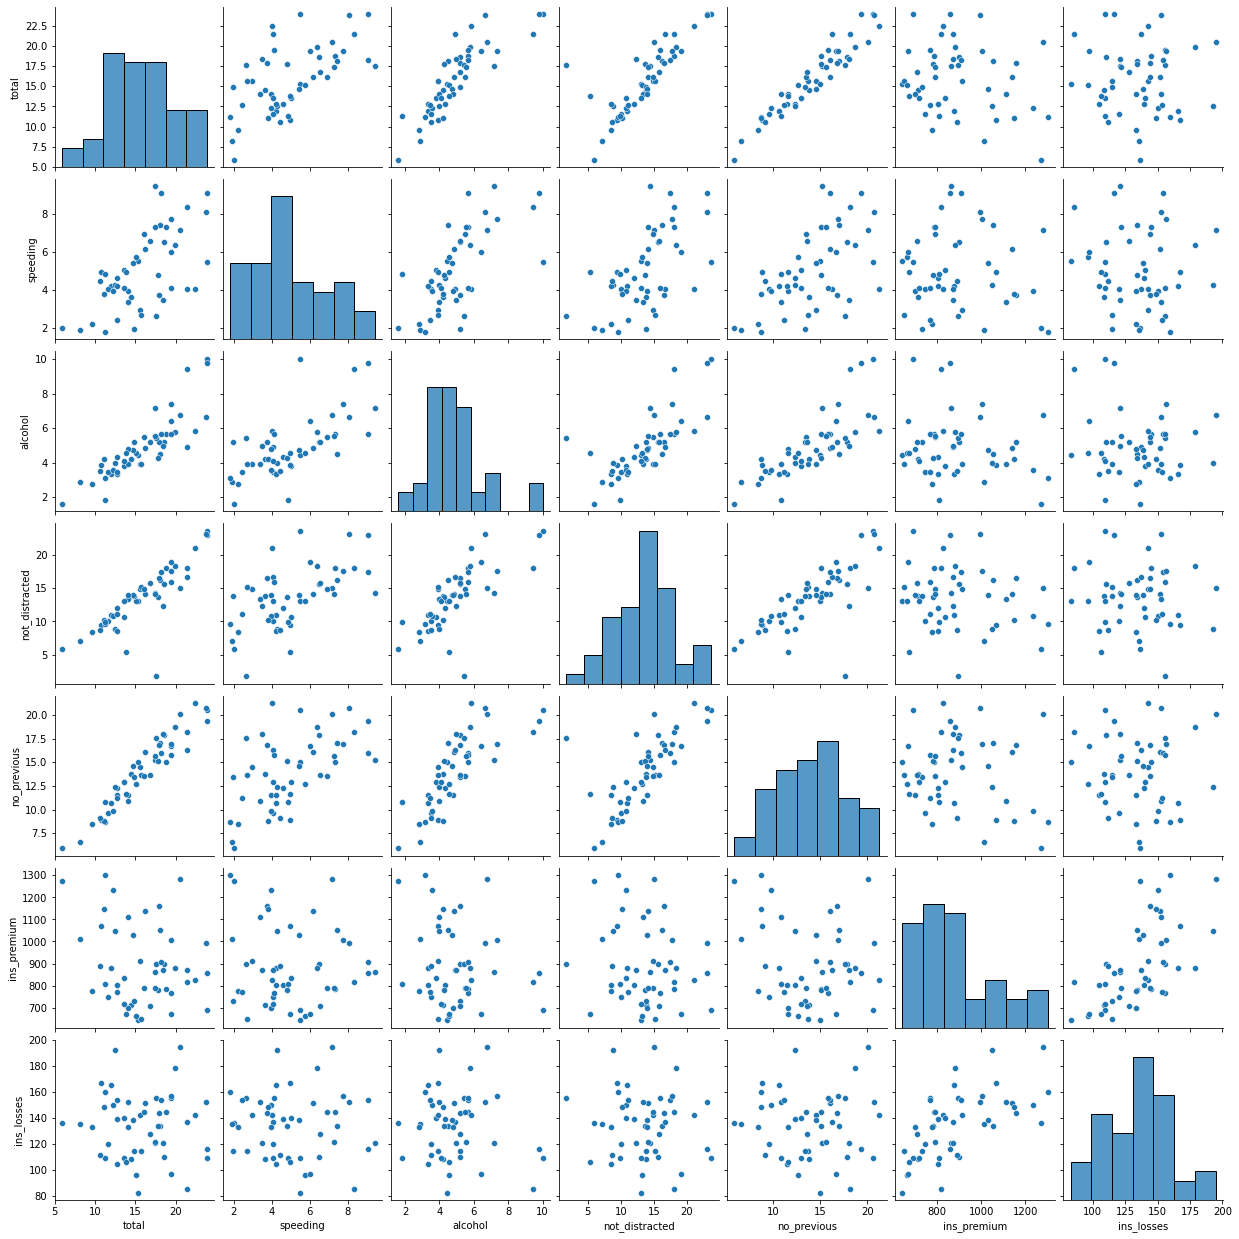

In [32]:
sns.pairplot(crash_df)

tips_df = sns.load_dataset('tips')

In [ ]:
tips_df = sns.load_dataset('iris')

sns.pairplot(tips_df)

In [33]:
Styling 
sns.set_style('white')

sns.jointplot(x='speeding', y ='alcohol', data=crash_df, kind='reg')

NameError: name 'Styling' is not defined

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

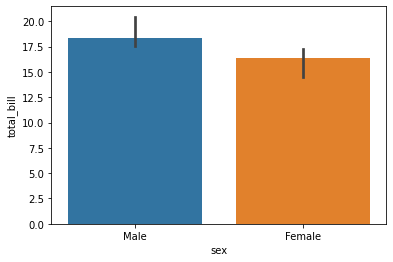

In [35]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)
#defaults to being aggragated based on mean 

In [36]:
Count 

NameError: name 'Count' is not defined

<AxesSubplot:xlabel='sex', ylabel='count'>

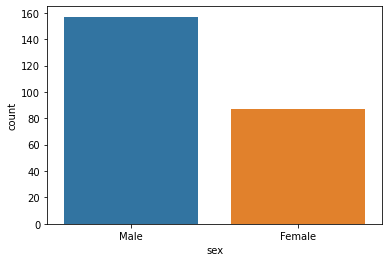

In [37]:
sns.countplot(x='sex', data=(tips_df))

Box plot allows you to compare different variables and shows the quartiles 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

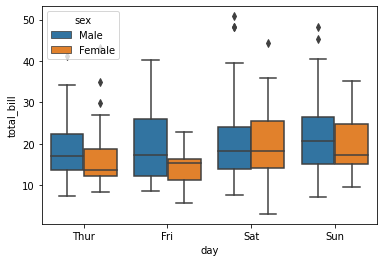

In [39]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')


<AxesSubplot:xlabel='day', ylabel='total_bill'>

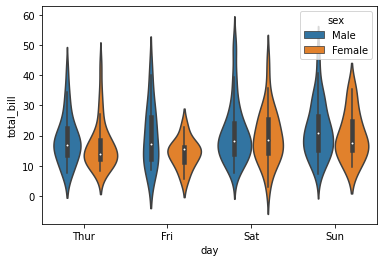

In [40]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex')
#violin plot uses KDE estimation 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

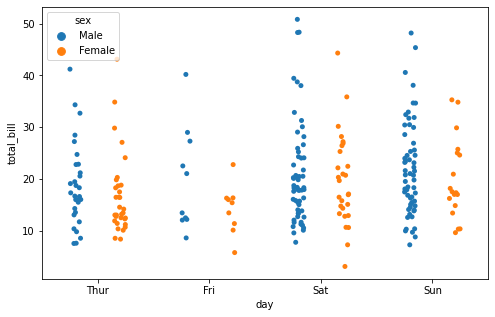

In [46]:
plt.figure(figsize=(8,5))

sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)

In [ ]:
Swarmsns.set_stype('dark')
sns.set_context('talk')
sns.stripplot

Line Plots

In [47]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))


<AxesSubplot:>

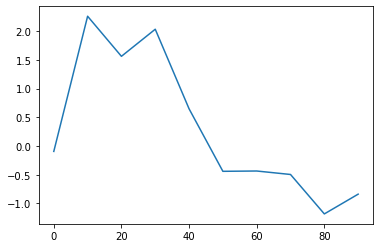

In [48]:
s.plot()

In [49]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))

<AxesSubplot:>

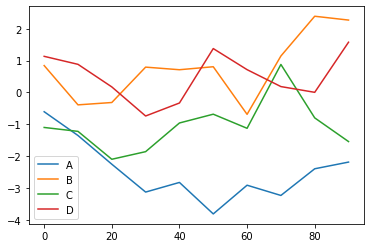

In [50]:
df.plot()

### Series.plot Method arguments 

In [52]:
label - label for legend 
ax - matplotlib subplot object to plot on 
style - style string 
alpha - the plot fill opacity(from 0 to 1)
Can be 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'
use_index - use the object index for tick tabels 
rot - rotation of tick labels 
xticks - Values to use for x-axis ticks 
yticks - Values to use for y-axis ticks 
x-axis limits ([0, 10])
y-axis limits 
Display axis grid (on by default)

SyntaxError: invalid syntax (1066873164.py, line 1)

### DataFrame- specific plot arguments

In [ ]:
subplots- Plot each DataFrame column in a separate subplot 
sharex- If subplots=True, share the same x-axis, linking ticks and limits 
if subplots=True, share the same y-axis 
figsize Size of figure to create as tuple 
Plot title as string 
Add a subplot legend 
sort_columns - plot columns in alphabetical order; by default uses existing 
column order 

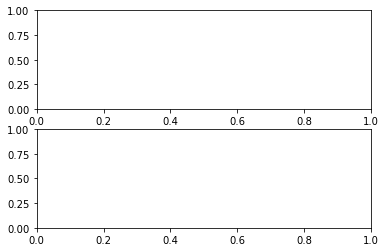

In [54]:
fig, axes = plt.subplots(2, 1)

In [55]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [59]:
data.plot.bar(ax=axes[0], color= 'k', alpha=0.7)

<AxesSubplot:>

In [60]:
data.plot.barh(ax=axes[1], color= 'k', alpha=0.7)

<AxesSubplot:>